## * This project had been written not in Colab but in local jupyter notebook environment

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
# Data frame column names

colnames=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli',
         'Mitoses','Class'] 

In [3]:
# Check raw data

df=pd.read_csv("Train_Data.txt",names=colnames)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
495,1170945,3,1,1,1,1,1,2,1,1,2
496,1181567,1,1,1,1,1,1,1,1,1,2
497,1182404,4,2,1,1,2,1,1,1,1,2
498,1204558,4,1,1,1,2,1,2,1,1,2


In [4]:
# Delete rows with nan values for restore

nan_value = float("NaN")
df.replace("?", nan_value, inplace=True)
non_missed_df=df.dropna(axis=0)
non_missed_df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
495,1170945,3,1,1,1,1,1,2,1,1,2
496,1181567,1,1,1,1,1,1,1,1,1,2
497,1182404,4,2,1,1,2,1,1,1,1,2
498,1204558,4,1,1,1,2,1,2,1,1,2


In [5]:
# Check rows with nan values

is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [6]:
# Restore missing values

mean_value_BN=int(round(np.mean(list(map(int,
                                         non_missed_df["Bare Nuclei"].values)))))
df.replace(nan_value, mean_value_BN, inplace=True)

In [7]:
# Set feature data and target data by using Restored data frame

x_train = torch.Tensor(df[colnames[1:-1]].values.astype(np.uint8))
y_train = torch.Tensor(df['Class'].replace({2:0, 4:1}).values.astype(np.uint8)).reshape(-1,1)

In [8]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x): 
        pred = torch.sigmoid(self.linear(x))
        return pred   #probability (not direct value)

    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [9]:
# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1718, -0.1471, -0.0646,  0.1565, -0.3138,  0.1999, -0.0686,  0.1696,
          0.0463]], requires_grad=True), Parameter containing:
tensor([-0.0408], requires_grad=True)]


In [10]:
# instantitate optimizer 
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2, weight_decay=0.001) # Set L2 regularize term lambda as 0.1

# training the model 
epochs = 2000
losses = []

for epoch in range(epochs):
    y_pred = model.forward(x_train)

    # calculrate loss 
    loss = criterion(y_pred, y_train)
    if (epoch%100==0):
        print("epoch: ", epoch, "loss: ", loss.item())
    losses.append(loss.item())

    optimizer.zero_grad() # clear gradients wrt parameters
    loss.backward()
    optimizer.step()

epoch:  0 loss:  0.6279498934745789
epoch:  100 loss:  0.2599795460700989
epoch:  200 loss:  0.1900835782289505
epoch:  300 loss:  0.1656917929649353
epoch:  400 loss:  0.15185266733169556
epoch:  500 loss:  0.1431153267621994
epoch:  600 loss:  0.13718856871128082
epoch:  700 loss:  0.1329578012228012
epoch:  800 loss:  0.12982051074504852
epoch:  900 loss:  0.1274247020483017
epoch:  1000 loss:  0.12555189430713654
epoch:  1100 loss:  0.12405992299318314
epoch:  1200 loss:  0.12285260111093521
epoch:  1300 loss:  0.12186268717050552
epoch:  1400 loss:  0.12104199081659317
epoch:  1500 loss:  0.12035506218671799
epoch:  1600 loss:  0.11977539956569672
epoch:  1700 loss:  0.1192827969789505
epoch:  1800 loss:  0.11886152625083923
epoch:  1900 loss:  0.11849933117628098


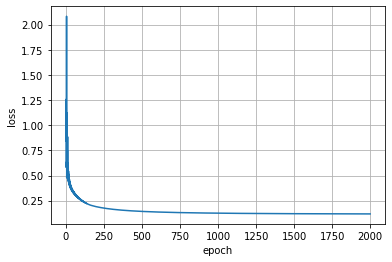

In [11]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()

In [12]:
# test model
df_test=pd.read_csv("Test_Data.txt",names=colnames)
x_test=torch.Tensor(df_test[colnames[1:-1]].replace({'?':4}).values.astype(np.uint8))
y_test=torch.Tensor(df_test['Class'].replace({2:0, 4:1}).values.astype(np.uint8))

In [13]:
no_correct = 0

for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct += 1

accuracy = no_correct/len(x_test)*100
print("Predcition accuracy = {}%".format(accuracy))

Predcition accuracy = 100.0%
